# **MISFIT ANALYSIS**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# load the dataframe
df = pd.read_csv("/home/andrea/Documents/Develop/rs2022-rfm/data/rfm_g_2020_09_01.csv",
                 delimiter=";");
QTL = 99
QCUT = 1

In [3]:
df['dt_min']= pd.to_datetime(df['dt_min'])
df['dt_max']= pd.to_datetime(df['dt_max'])

In [4]:
df = df[ (df['tmax'] > 1) & (df['monetary'] > 1)]

## **99th percentile based outlier removal**

In [5]:
df_99 = df[ (df['monetary'] < np.percentile(df['monetary'], QTL)) &   (df['frequency'] < np.percentile(df['frequency'], QTL))]

### Real Frequency

In [6]:
df_99['t_days_op'] = df_99['t_days_op'] + 1 # Work around this. Warning is annoying
df_99 = df_99.assign(freq_day = df_99['frequency']/ df_99['t_days_op'])

/tmp/ipykernel_5507/4165238119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_99['t_days_op'] = df_99['t_days_op'] + 1 # Work around this. Warning is annoying


In [7]:
print(df_99[df_99['freq_day'] == df_99['freq_day'].max()])
print('')
print(df_99.loc[574762])

        codice_cliente  recency  frequency  monetary  tmin   tmax     tmed  \
574762         1518079      311        100   2034.94  1.18  120.0  20.3494   

             tdev     dt_min     dt_max  t_days_op  freq_day  
574762  19.560436 2021-02-24 2021-02-24          1     100.0  

codice_cliente                1518079
recency                           311
frequency                         100
monetary                      2034.94
tmin                             1.18
tmax                            120.0
tmed                          20.3494
tdev                        19.560436
dt_min            2021-02-24 00:00:00
dt_max            2021-02-24 00:00:00
t_days_op                           1
freq_day                        100.0
Name: 574762, dtype: object


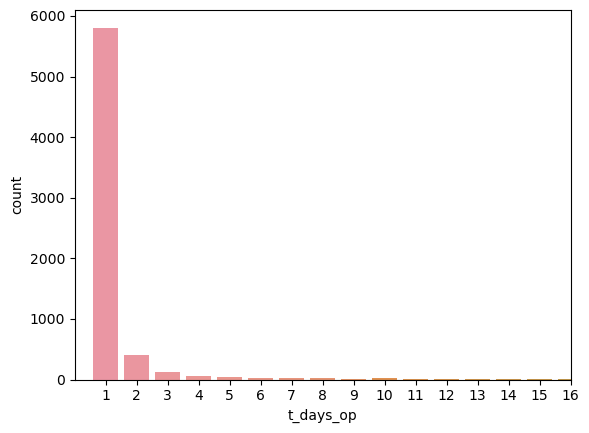

In [8]:
fig, ax = plt.subplots()
# df_realf[df_realf['freq_day'] > 1]
sns.countplot(ax=ax, data = df_99[df_99['freq_day'] > 1], x='t_days_op')
ax.set_xlim(-1, 15)
# ax.set_xlim(-1)

plt.show()

## **Frquency based-only outlier removal**

In [9]:
df_cut = df.copy()

In [10]:
df_cut['t_days_op'] = df_cut['t_days_op'] + 1 # Why no warning here?

df_cut = df_cut.assign(freq_day = df_cut['frequency']/ df_cut['t_days_op'])
df_cut

,codice_cliente,recency,frequency,monetary,tmin,tmax,tmed,tdev,dt_min,dt_max,t_days_op,freq_day
0,39018,4,199,17109.79,-58.08,784.80,85.978844,103.708091,2021-01-02,2021-12-28,361,0.551247
1,39020,288,1,38.83,38.83,38.83,38.830000,NaN,2021-03-19,2021-03-19,1,1.000000
2,39026,205,4,29.76,4.42,11.50,7.440000,3.107893,2021-02-06,2021-06-10,125,0.032000
3,39032,10,56,3052.51,6.01,166.23,54.509107,32.959800,2021-01-05,2021-12-22,352,0.159091
4,39037,29,16,896.14,15.51,102.37,56.008750,23.022172,2021-01-12,2021-12-03,326,0.049080
...,...,...,...,...,...,...,...,...,...,...,...,...
725857,1858159,16,59,3863.78,5.88,123.58,65.487797,20.684622,2021-01-03,2021-12-16,348,0.169540
725858,1859096,40,7,155.32,12.17,41.33,22.188571,9.749072,2021-03-12,2021-11-22,256,0.027344
725859,1859688,180,8,142.98,1.24,52.02,17.872500,16.525796,2021-01-17,2021-07-05,170,0.047059
725860,1859864,5,43,922.83,2.58,44.81,21.461163,9.945084,2021-01-11,2021-12-27,351,0.122507


In [15]:
# df_cut['freq_day'][df_cut['freq_day'] < 1]
df_cut = df_cut[df_cut['freq_day'] < 1]

In [16]:
df_cut['freq_day']
# print(df_cut[df_cut['freq_day'] == df_cut['freq_day'].max()])
# print('')
# print(df_cut.loc[713039])

0         0.551247
2         0.032000
3         0.159091
4         0.049080
5         0.020619
            ...   
725857    0.169540
725858    0.027344
725859    0.047059
725860    0.122507
725861    0.125954
Name: freq_day, Length: 631598, dtype: float64

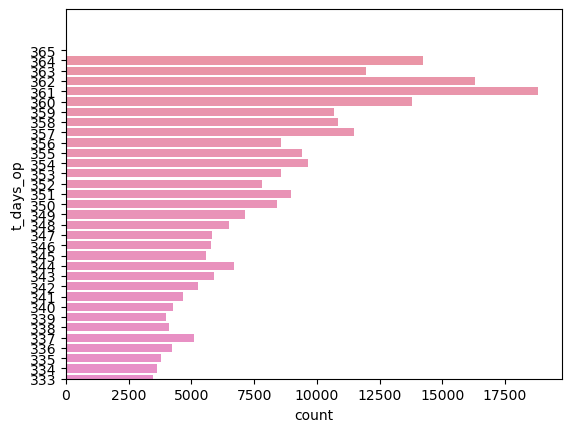

In [38]:
fig, ax = plt.subplots()
# df_realf[df_realf['freq_day'] > 1]
sns.countplot(ax=ax, data = df_cut, y='t_days_op')
ax.set_ylim(330, 366)
# ax.set_xlim(-1)

plt.show()

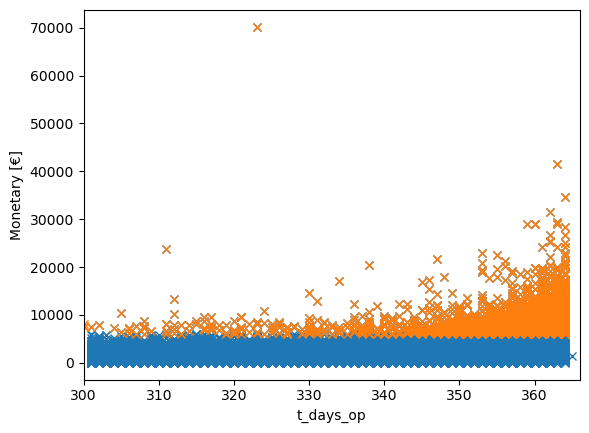

In [30]:
fig, ax = plt.subplots()
ax.plot(df_cut['t_days_op'][df_cut['t_days_op'] > 300 ],  df_cut['monetary'][df_cut['t_days_op'] > 300 ], 'x')
ax.plot(df_cut['t_days_op'][df_cut['monetary'] > 6000 ],  df_cut['monetary'][df_cut['monetary'] > 6000 ], 'x')
ax.set_xlim(300, 366)
ax.set_xlabel('t_days_op')
ax.set_ylabel('Monetary [€]')

plt.show()

In [23]:
10000/365

27.397260273972602

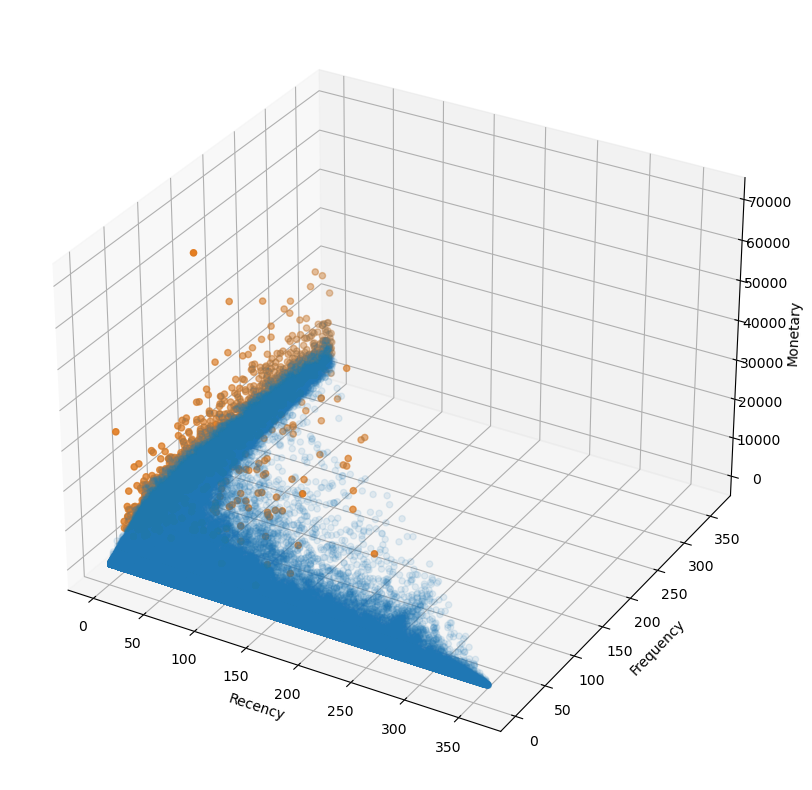

In [41]:
# sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_cut['recency'], df_cut['frequency'], df_cut['monetary'], alpha=0.1)
ax.scatter(df_cut['recency'][df_cut['monetary'] > 6000], df_cut['frequency'][df_cut['monetary'] > 6000], df_cut['monetary'][df_cut['monetary'] > 6000])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()
plt.close()